# Keras Functional API for Model Building

### Introduction to Keras Functional API for Model Building

The Keras **Functional API** is an advanced and flexible way to build deep learning models that go beyond the **Sequential API**. It allows the creation of models with complex architectures, such as:

- Models with multiple inputs and outputs.
- Models that share layers.
- Non-linear topologies like residual connections or directed acyclic graphs.

While the **Sequential API** is ideal for straightforward, layer-stacked models, the **Functional API** offers more versatility and control for sophisticated designs.

---

#### **Key Concepts of the Functional API**
1. **Input Layer**:
   - Every model starts with an input layer that defines the shape of the input data.
   - Created using `tf.keras.Input`.

   ```python
   from tensorflow.keras.layers import Input
   input_layer = Input(shape=(784,))
   ```

2. **Connecting Layers**:
   - Layers are connected by calling them like functions, passing outputs from one layer as inputs to the next.

   ```python
   from tensorflow.keras.layers import Dense
   hidden_layer = Dense(64, activation='relu')(input_layer)
   output_layer = Dense(10, activation='softmax')(hidden_layer)
   ```

3. **Defining the Model**:
   - The model is defined by specifying inputs and outputs.
   - This is done using `tf.keras.Model`.

   ```python
   from tensorflow.keras.models import Model
   model = Model(inputs=input_layer, outputs=output_layer)
   ```

4. **Compilation and Training**:
   - After defining the architecture, the model is compiled and trained like any other Keras model.

   ```python
   model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   model.fit(x_train, y_train, epochs=10, batch_size=32)
   ```

---

#### **Why Use the Functional API?**
- **Flexibility**: Enables the creation of non-linear and complex architectures.
- **Multiple Inputs/Outputs**: Allows defining models that take multiple inputs or produce multiple outputs.
- **Layer Sharing**: Layers can be reused across multiple inputs and outputs.
- **Customization**: Offers fine-grained control for advanced model designs.

---

#### **Example: Multi-Input, Multi-Output Model**
Below is an example of a model with two inputs and two outputs:

```python
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# Define inputs
input_1 = Input(shape=(32,))
input_2 = Input(shape=(16,))

# Hidden layers for input 1
x1 = Dense(64, activation='relu')(input_1)

# Hidden layers for input 2
x2 = Dense(32, activation='relu')(input_2)

# Combine inputs
combined = concatenate([x1, x2])

# Output layers
output_1 = Dense(1, activation='sigmoid')(combined)
output_2 = Dense(10, activation='softmax')(combined)

# Define the model
model = Model(inputs=[input_1, input_2], outputs=[output_1, output_2])

# Compile the model
model.compile(optimizer='adam', 
              loss=['binary_crossentropy', 'categorical_crossentropy'], 
              metrics=['accuracy'])

# Summary of the model
model.summary()
```

---

#### **Comparison to Sequential API**
| Feature               | Sequential API                      | Functional API                          |
|-----------------------|-------------------------------------|----------------------------------------|
| **Ease of Use**       | Simple to use for basic models      | Slightly more complex                  |
| **Topology**          | Linear, stacked layers only         | Arbitrary topologies supported         |
| **Flexibility**       | Limited                            | High                                   |
| **Multiple I/O**      | Not Supported                      | Fully Supported                        |

The Keras Functional API is a powerful tool for creating versatile and custom neural network architectures, making it ideal for more demanding machine learning applications.

### The Functional API in Keras is versatile and allows for creating complex neural network architectures beyond the sequential model. Below are some meaningful examples demonstrating its capabilities, each using a real dataset.

# **1. Creating a Multi-Input Model**
### **Use Case:** Combining structured data and image data for prediction (e.g., predicting house prices using both metadata and house images).
#### **Dataset:** California Housing Dataset.

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
structured_input (InputLayer)   [(None, 10)]         0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 126, 126, 32) 896         image_input[0][0]                
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 64)           704         structured_input[0][0]           
____________________________________________________________________________________________

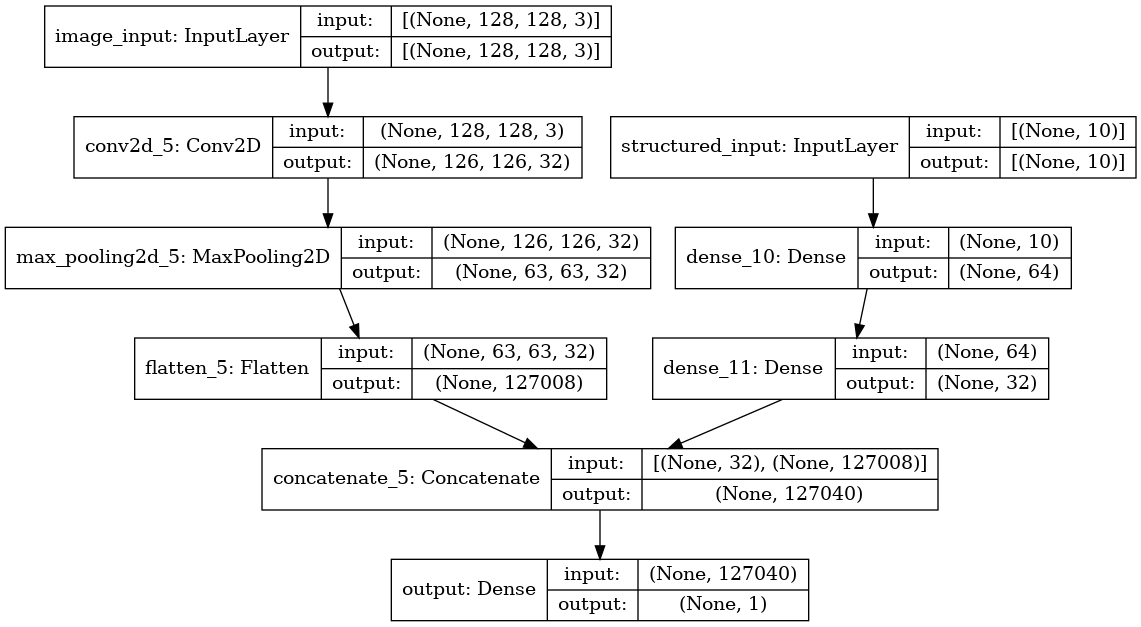

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Concatenate
from sklearn.datasets import fetch_california_housing

# Input for structured data
structured_input = Input(shape=(10,), name="structured_input")

# Process structured data
x1 = Dense(64, activation='relu')(structured_input)
x1 = Dense(32, activation='relu')(x1)

# Input for image data (dummy example)
image_input = Input(shape=(128, 128, 3), name="image_input")

# Process image data
x2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x2 = tf.keras.layers.MaxPooling2D((2, 2))(x2)
x2 = tf.keras.layers.Flatten()(x2)

# Combine processed data
combined = Concatenate()([x1, x2])

# Output layer
output = Dense(1, activation='linear', name="output")(combined)

# Build model
model = Model(inputs=[structured_input, image_input], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display model summary
model.summary()

# Visualize the model architecture
plot_model(
    model,
    to_file="Models/MultiInputModel.png",  # File to save the plot
    show_shapes=True,          # Show input and output shapes
    show_layer_names=True      # Show layer names
)

# **2. Building a Shared Weights Model**
### **Use Case:** Text similarity tasks (e.g., predicting whether two sentences are similar).
#### **Dataset:** Quora Question Pairs.

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
question1 (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
question2 (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 128)     640000      question1[0][0]                  
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 128)     640000      question2[0][0]                  
____________________________________________________________________________________________

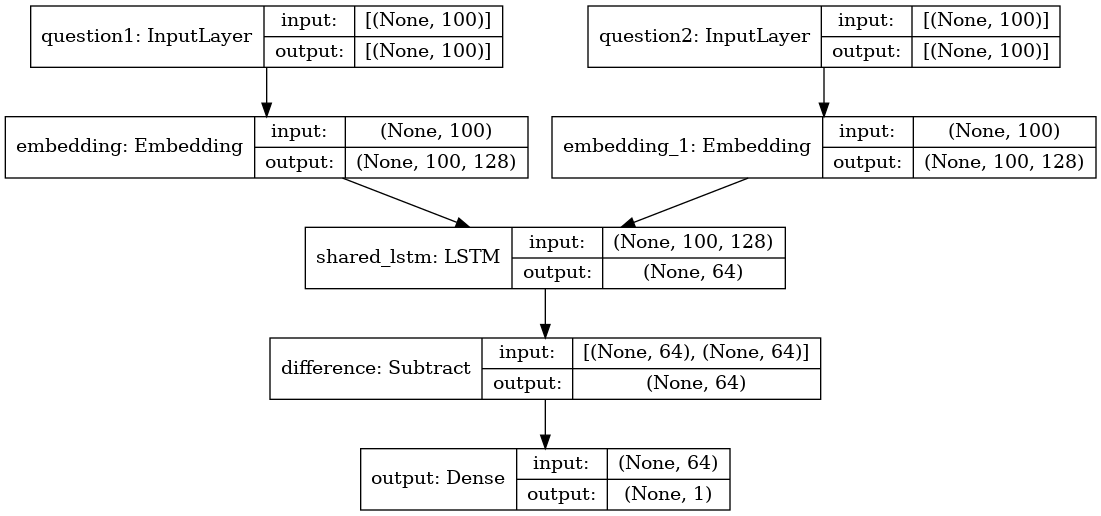

In [14]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Subtract
from tensorflow.keras.models import Model

# Shared LSTM layer
shared_lstm = LSTM(64, name="shared_lstm")

# Input for question 1
input_q1 = Input(shape=(100,), name="question1")
x1 = Embedding(input_dim=5000, output_dim=128)(input_q1)
x1 = shared_lstm(x1)

# Input for question 2
input_q2 = Input(shape=(100,), name="question2")
x2 = Embedding(input_dim=5000, output_dim=128)(input_q2)
x2 = shared_lstm(x2)

# Merge features using subtraction
diff = Subtract(name="difference")([x1, x2])

# Output layer
output = Dense(1, activation='sigmoid', name="output")(diff)

# Build model
model = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Visualize the model architecture
plot_model(
    model,
    to_file="Models/SharedWeightsModel.png",  # File to save the plot
    show_shapes=True,          # Show input and output shapes
    show_layer_names=True      # Show layer names
)

# **3. Implementing Residual Connections**
### **Use Case:** Deep neural networks for classification with residual (shortcut) connections.
#### **Dataset:** CIFAR-10.

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 32, 32, 32)   896         input[0][0]                      
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 32, 32, 32)   9248        conv2d_6[0][0]                   
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 32)   128         conv2d_7[0][0]                   
____________________________________________________________________________________________

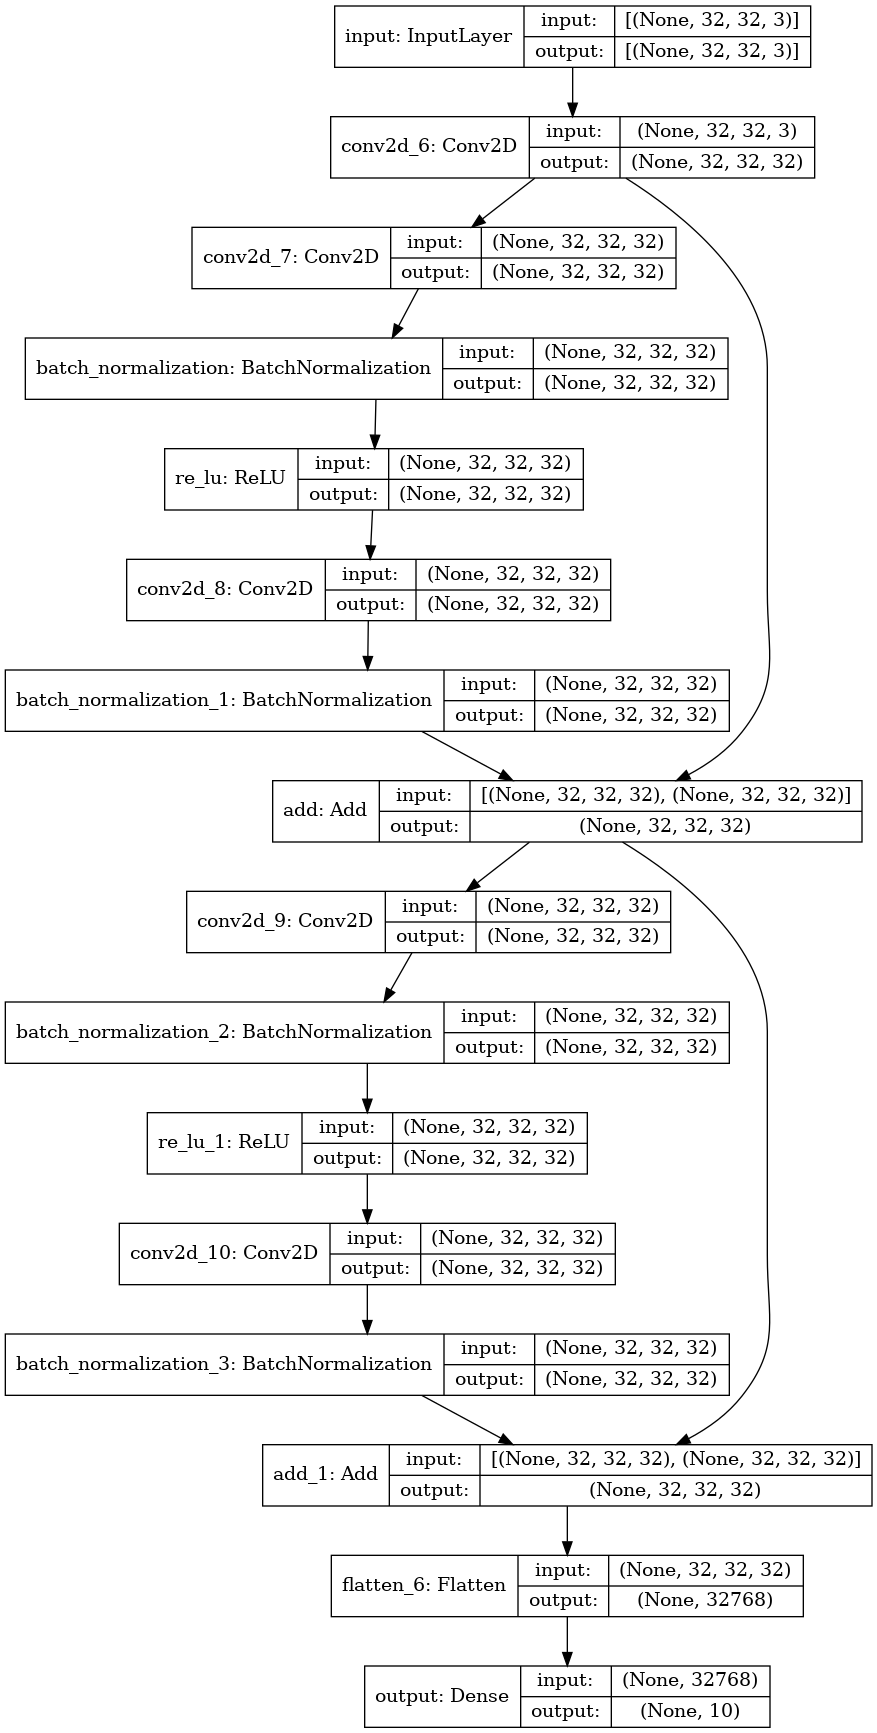

In [15]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, Flatten, Dense
from tensorflow.keras.models import Model

# Residual block function
def residual_block(x, filters, kernel_size):
    shortcut = x
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    return Add()([shortcut, x])

# Input layer
input_layer = Input(shape=(32, 32, 3), name="input")

# Initial Conv2D layer
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)

# Add residual blocks
x = residual_block(x, 32, (3, 3))
x = residual_block(x, 32, (3, 3))

# Classification layers
x = Flatten()(x)
output = Dense(10, activation='softmax', name="output")(x)

# Build model
model = Model(inputs=input_layer, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Visualize the model architecture
plot_model(
    model,
    to_file="Models/ResidualConnectionsModel.png",  # File to save the plot
    show_shapes=True,          # Show input and output shapes
    show_layer_names=True      # Show layer names
)

# **4. Multi-Output Model**
### **Use Case:** Predicting multiple targets simultaneously (e.g., emotion classification and sentiment analysis).
#### **Dataset:** Multi-label Emotion Dataset.

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 100)]        0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 64)           6464        input[0][0]                      
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 32)           2080        dense_12[0][0]                   
__________________________________________________________________________________________________
emotion_output (Dense)          (None, 5)            165         dense_13[0][0]                   
____________________________________________________________________________________________

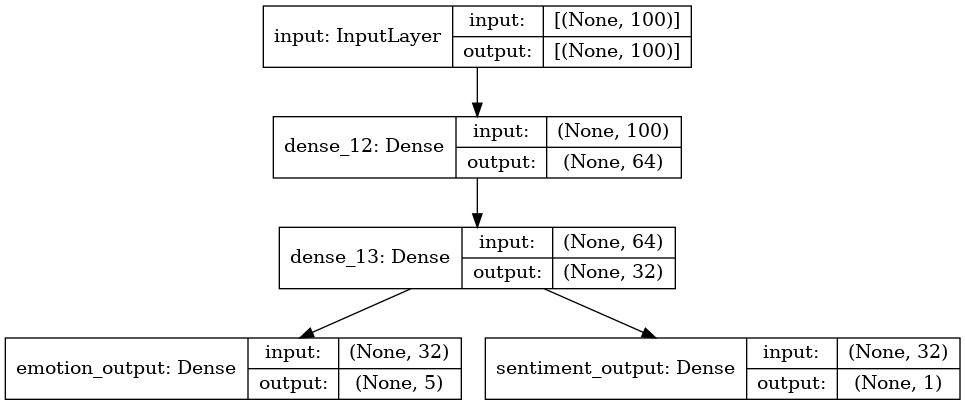

In [17]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Input layer
input_layer = Input(shape=(100,), name="input")

# Shared layers
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='relu')(x)

# Output 1: Emotion classification
emotion_output = Dense(5, activation='softmax', name="emotion_output")(x)

# Output 2: Sentiment analysis
sentiment_output = Dense(1, activation='sigmoid', name="sentiment_output")(x)

# Build model
model = Model(inputs=input_layer, outputs=[emotion_output, sentiment_output])

# Compile model
model.compile(optimizer='adam', 
              loss={'emotion_output': 'categorical_crossentropy', 'sentiment_output': 'binary_crossentropy'},
              metrics={'emotion_output': 'accuracy', 'sentiment_output': 'accuracy'})

# Display model summary
model.summary()

# Visualize the model architecture
plot_model(
    model,
    to_file="Models/MultiOutputModel.png",  # File to save the plot
    show_shapes=True,          # Show input and output shapes
    show_layer_names=True      # Show layer names
)

# **5. Dynamic Architectures**
### **Use Case:** Designing a dynamic architecture based on input conditions.
#### **Dataset:** Any dynamic input scenario (dummy example provided).

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20)]              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


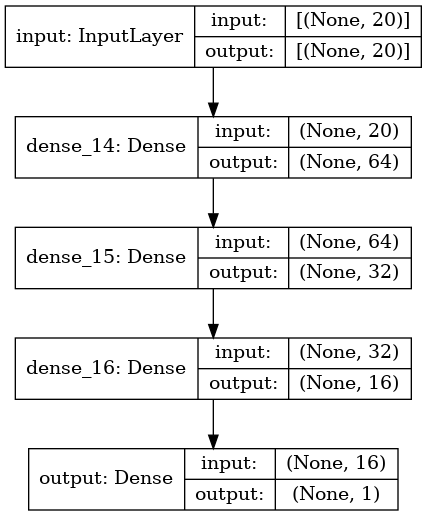

In [18]:
def dynamic_model(input_shape, layers):
    input_layer = Input(shape=input_shape, name="input")
    x = input_layer
    for units in layers:
        x = Dense(units, activation='relu')(x)
    output = Dense(1, activation='sigmoid', name="output")(x)
    return Model(inputs=input_layer, outputs=output)

# Create a model dynamically
model = dynamic_model((20,), [64, 32, 16])

# Compile and summarize
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Visualize the model architecture
plot_model(
    model,
    to_file="Models/DynamicArchitecturesModel.png",  # File to save the plot
    show_shapes=True,          # Show input and output shapes
    show_layer_names=True      # Show layer names
)

In [19]:
conda env export > environment.yml


Note: you may need to restart the kernel to use updated packages.
